# Lab2 - Concrete compressive strength regression (35 marks total)
Author: Michael Le

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [3]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    ''' 
    #TODO: add function body here
    # Returns a dictionary with the training and testing times for each validation, as well as the training and testing scores
    result = cross_validate(model, X, y, cv=cv, return_train_score=True, scoring='neg_root_mean_squared_error')
    df = pd.DataFrame.from_dict(result, orient='columns', dtype=None, columns=None)
    # print(df)
    mean_train_score = df["train_score"].mean()
    mean_test_score = df["test_score"].mean()
    # print(mean_train_score, mean_test_score)
    return (mean_train_score, mean_test_score)
    
    

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [4]:
#TODO: load the yellowbrick concrete Dataset object and access the README
from yellowbrick.datasets.loaders import load_concrete

dataset = load_concrete(return_dataset=True)
print(dataset.README)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

### *Question 1:* What is the target variable name and units in this dataset?

*YOUR ANSWER HERE*  
The target variable name is "strength", which stands for Concrete Compressive Strength and is in units of MPa.

### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [5]:
#TODO: Load feature matrix X and target vector y, print shapes
from sklearn.model_selection import train_test_split

X, y = load_concrete()

# X.head()
# y.head()
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}\n")
print(f"Type of X columns: \n{X.dtypes}\n")
print(f"Type of X: \n{X.dtypes.dtype}\n")
print(f"Type of y: \n{y.dtypes}\n")



Shape of X: (1030, 8)
Shape of y: (1030,)

Type of X columns: 
cement    float64
slag      float64
ash       float64
water     float64
splast    float64
coarse    float64
fine      float64
age         int64
dtype: object

Type of X: 
object

Type of y: 
float64



## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [6]:
# TODO: print range (minimum and maximum) of features
for feature_name, minimum, maximum in zip(X.columns.values, X.min(), X.max()):
    print(f"Feature: {feature_name}, Minimum: {minimum}, Maximum: {maximum}")
    
print(y.min())
print(y.max())

Feature: cement, Minimum: 102.0, Maximum: 540.0
Feature: slag, Minimum: 0.0, Maximum: 359.4
Feature: ash, Minimum: 0.0, Maximum: 200.1
Feature: water, Minimum: 121.75, Maximum: 247.0
Feature: splast, Minimum: 0.0, Maximum: 32.2
Feature: coarse, Minimum: 801.0, Maximum: 1145.0
Feature: fine, Minimum: 594.0, Maximum: 992.6
Feature: age, Minimum: 1.0, Maximum: 365.0
2.331807832
82.5992248


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

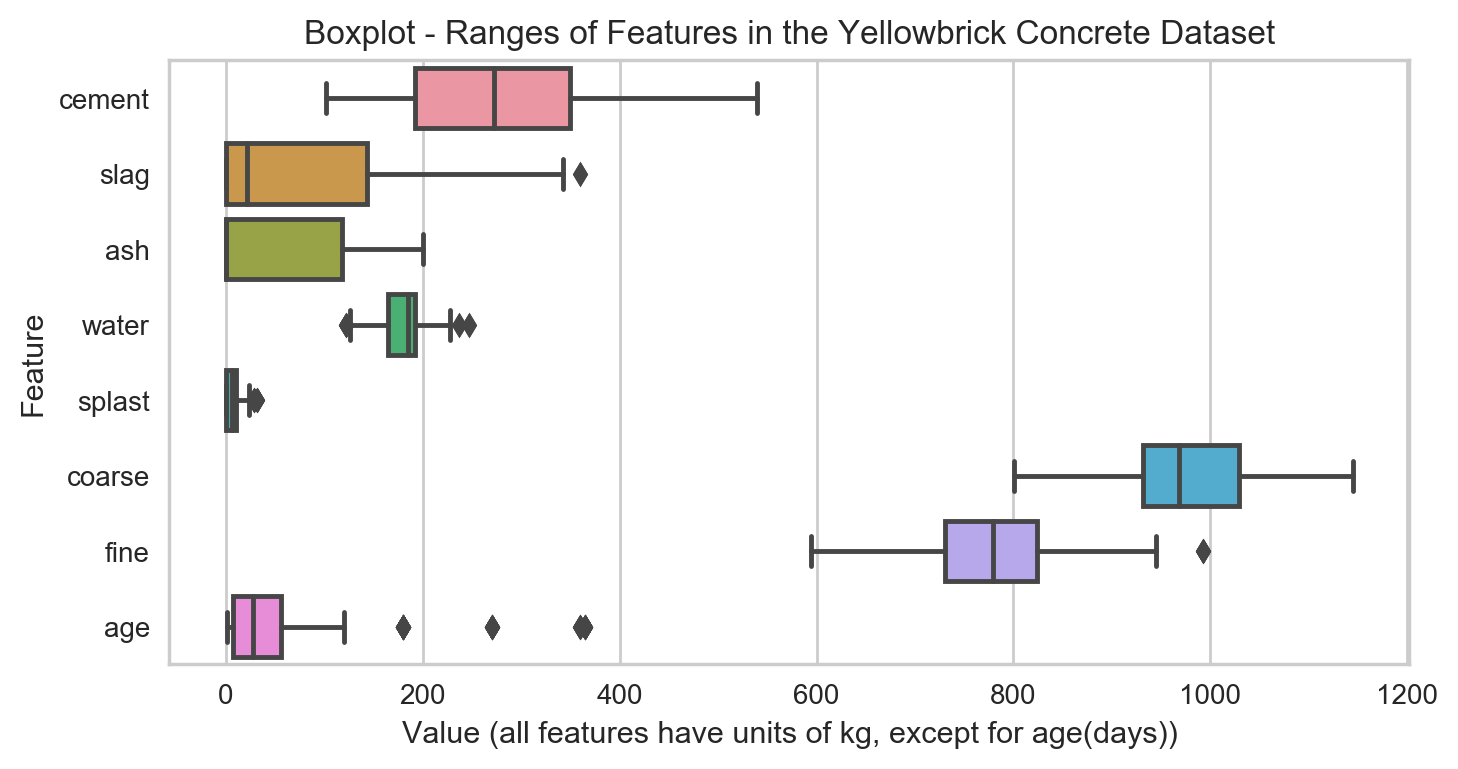

In [7]:
#TODO: add boxplot of features
plt.figure(figsize=(8, 4), dpi=200)
sea_boxplot = sns.boxplot(data=X, orient="h"); # Horizontal boxplot
sea_boxplot.set_title("Boxplot - Ranges of Features in the Yellowbrick Concrete Dataset");
sea_boxplot.set_ylabel("Feature"); # Add Feature label to y-axis
sea_boxplot.set_xlabel("Value (all features have units of kg, except for age(days))"); # Add Value label to x-axis


### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

,cement,slag,ash,water,splast,coarse,fine,age
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604
splast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000


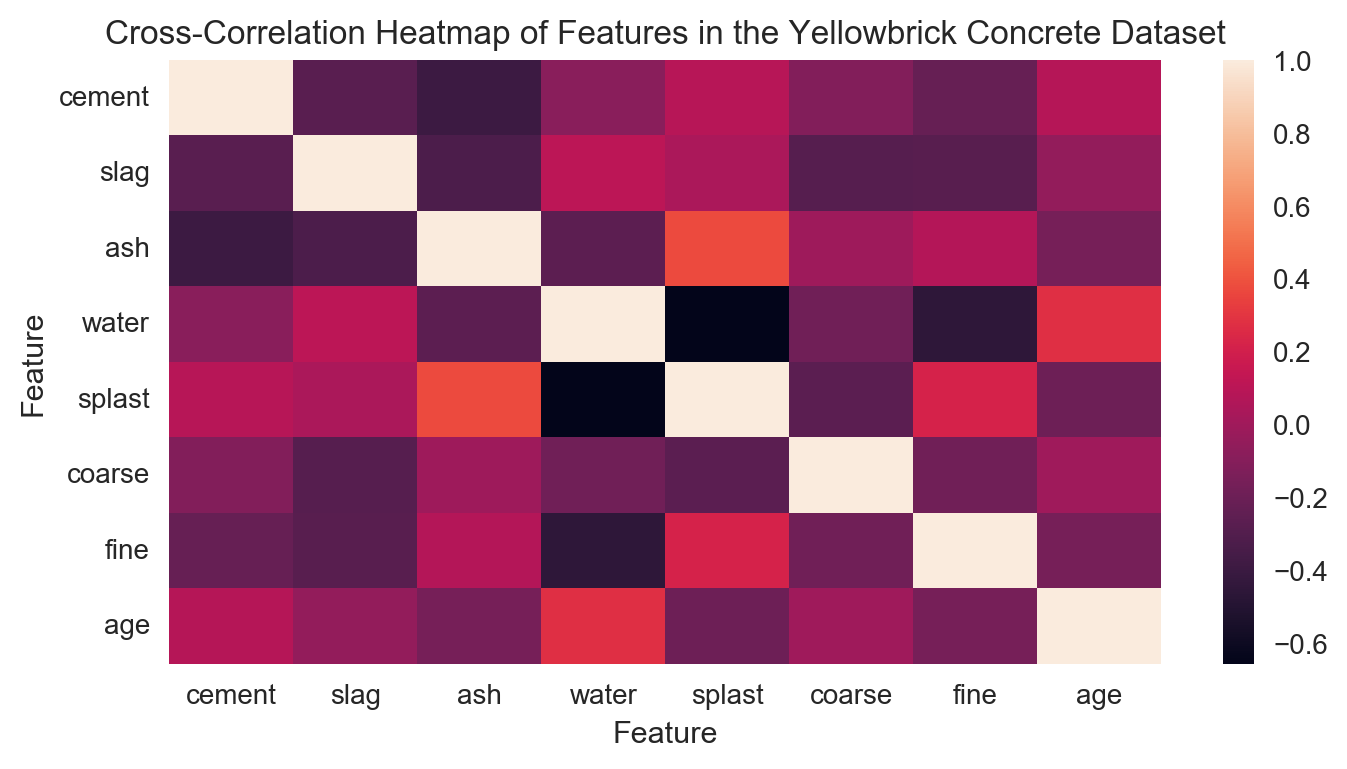

In [8]:
# TODO: add pairwise cross-correlation heatmap of features
plt.figure(figsize=(8, 4), dpi=200)
corr = X.corr() 
heatmap = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
heatmap.set_title("Cross-Correlation Heatmap of Features in the Yellowbrick Concrete Dataset");
heatmap.set_ylabel("Feature"); # Add Feature label to y-axis
heatmap.set_xlabel("Feature"); # Add Feature label to x-axis
corr

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

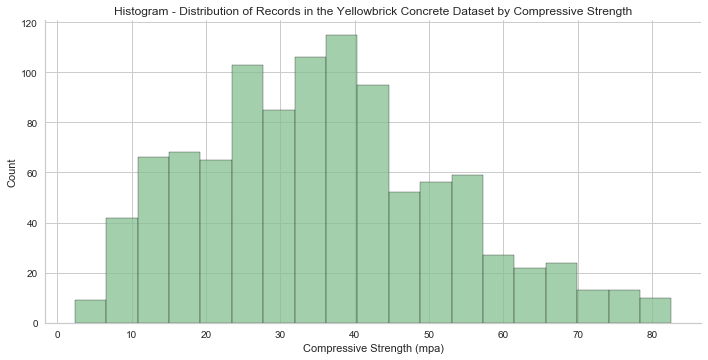

In [9]:
#TODO: Add histogram of target vector

strength_hist = sns.displot(data=y, color='#86bf91', height=5, aspect=2)
strength_hist.set_axis_labels("Compressive Strength (mpa)", "Count") # Assign Compressive Strength and Count as the axis labels
strength_hist.set(title="Histogram - Distribution of Records in the Yellowbrick Concrete Dataset by Compressive Strength") # Set title of plt

## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# TODO: train-test split
# We are assuming that 20% of the data served as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37)

## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [13]:
#TODO: Calling get_regressor_neg_rms() for each model
models = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]
for model in models:
    model_name = type(model).__name__
    mean_train_score, mean_test_score = get_regressor_neg_rms(model, X_train, y_train)
    print(f"{model_name}: Mean Training Negative Root MSE = {'{:.2f}'.format(mean_train_score)}, Mean Testing Negative Root MSE = {'{:.2f}'.format(mean_test_score)}")

LinearRegression: Mean Training Negative Root MSE = -10.29, Mean Testing Negative Root MSE = -10.39
RandomForestRegressor: Mean Training Negative Root MSE = -2.12, Mean Testing Negative Root MSE = -4.98
GradientBoostingRegressor: Mean Training Negative Root MSE = -3.69, Mean Testing Negative Root MSE = -4.98


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

*YOUR ANSWER HERE*  
For linear regression, this model is potentially underfitting the data since the training Negative Root MSE at -10.29 is very close to the testing Negative Root MSE at -10.39, which is only a difference of 0.10. Both of these values are also quite poor.

For RandomForestRegressor, this model is potentially overfitting the data since the validation/testing Negative Root MSE is significantly worse than the training Negative Root MSE.

For GradientForestRegressor, this model is potentially overfitting the data since the validation/testing Negative Root MSE is worse than the training Negative Root MSE. However, the difference between the two scores is not as big as the RandomForestRegressor.



## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [19]:
#TODO: Using nested for loops iterate parameter combinations and print results
depths = [10, 15, 20]
estimators = [100, 200, 400]
for depth in depths:
    for estimator in estimators:
        model = RandomForestRegressor(random_state=64, max_depth=depth, n_estimators=estimator)
        mean_train_score, mean_test_score = get_regressor_neg_rms(model, X_train, y_train, cv=7)
        print(f"Max Depth = {depth}, Number of Estimators = {estimator}, Mean Training Negative Root MSE = {'{:.2f}'.format(mean_train_score)}, Mean Testing Negative Root MSE = {'{:.2f}'.format(mean_test_score)}")

Max Depth = 10, Number of Estimators = 100, Mean Training Negative Root MSE = -2.44, Mean Testing Negative Root MSE = -5.09
Max Depth = 10, Number of Estimators = 200, Mean Training Negative Root MSE = -2.42, Mean Testing Negative Root MSE = -5.05
Max Depth = 10, Number of Estimators = 400, Mean Training Negative Root MSE = -2.41, Mean Testing Negative Root MSE = -5.05
Max Depth = 15, Number of Estimators = 100, Mean Training Negative Root MSE = -2.12, Mean Testing Negative Root MSE = -4.97
Max Depth = 15, Number of Estimators = 200, Mean Training Negative Root MSE = -2.11, Mean Testing Negative Root MSE = -4.94
Max Depth = 15, Number of Estimators = 400, Mean Training Negative Root MSE = -2.10, Mean Testing Negative Root MSE = -4.93
Max Depth = 20, Number of Estimators = 100, Mean Training Negative Root MSE = -2.12, Mean Testing Negative Root MSE = -4.98
Max Depth = 20, Number of Estimators = 200, Mean Training Negative Root MSE = -2.11, Mean Testing Negative Root MSE = -4.95
Max Dept

### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

*YOUR ANSWER HERE*  
The combination of max_depth=15 and n_estimators=400 resulted in the best validation Negative Root MSE of -4.93, barely better than the second best validation Negative Root MSE of -4.94 from (max_depth=15, n_estimators=200) and (max_depth=20, n_estimators=400). When max_depth=15 and n_estimators=400, the training Negative Root MSE is -2.10 which is the second best value next to -2.09 from (max_depth=20, n_estimators=400).

Overall, the best model would use max_depth=20 and n_estimators=400 since it has the best training negative root MSE and second best testing negative root MSE.

## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [31]:
#TODO: retrain the best estimator
model = RandomForestRegressor(random_state=64, max_depth=20, n_estimators=400)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# TODO: print rms and r-squared for training and test set
y_train_pred = model.predict(X_train)
print("Training Data")
# squared=False returns RMSE value.
print(f"Root MSE = {'{:.2f}'.format(mean_squared_error(y_train, y_train_pred, squared=False))}, R-Squared: {'{:.3f}'.format(r2_score(y_train, y_train_pred))}")
y_test_pred = model.predict(X_test)
print("\nTesting Data")
print(f"Root MSE = {'{:.2f}'.format(mean_squared_error(y_test, y_test_pred, squared=False))}, R-Squared: {'{:.3f}'.format(r2_score(y_test, y_test_pred))}")

Training Data
Root MSE = 2.01, R-Squared: 0.986

Testing Data
Root MSE = 4.80, R-Squared: 0.916


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

*YOUR ANSWER HERE*

Compared to the Polynomial Regression testing RMS of 8.82 MPa and R2 of 0.791, my test RMS of 4.80 MPa is significantly better and my test R2 of 0.916 is significantly better. Therefore, my model outperforms the Polynomial Regression model on all metrics.

Compared to the Neural Network testing RMS of 4.32 MPa and R2 of 0.929, my test RMS of 4.80 MPa is worse and my test R2 of 0.916 is slightly worse. Overall, my model does not outperform the neural network model.

### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


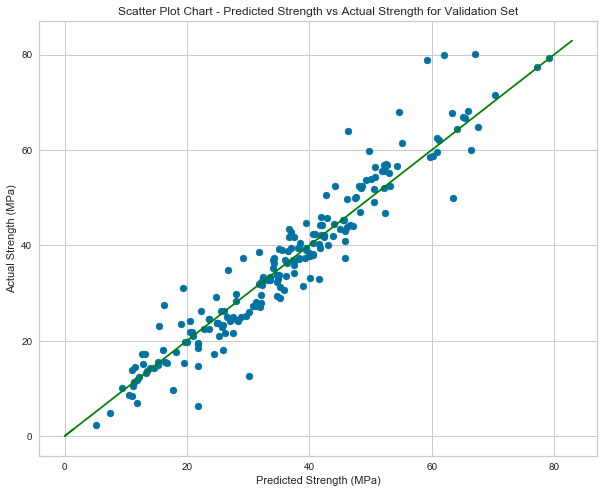

In [48]:
#TODO: predicted-actual plot
# Your solution goes here
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x=y_test_pred, y=y_test)
ax.set_title("Scatter Plot Chart - Predicted Strength vs Actual Strength for Validation Set") # Add title to plot
ax.set_xlabel("Predicted Strength (MPa)") # Add label to x-axis
ax.set_ylabel("Actual Strength (MPa)") # Add label to y-axis

x = np.linspace(0, plt.xlim(), 100)
y = x
plt.plot(x, x, color = 'green') # Add line of unity with slope = 1 and offset 0 to the plot


### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



Text(0, 0.5, 'Difference in Actual and Predicted Strength (MPa)')

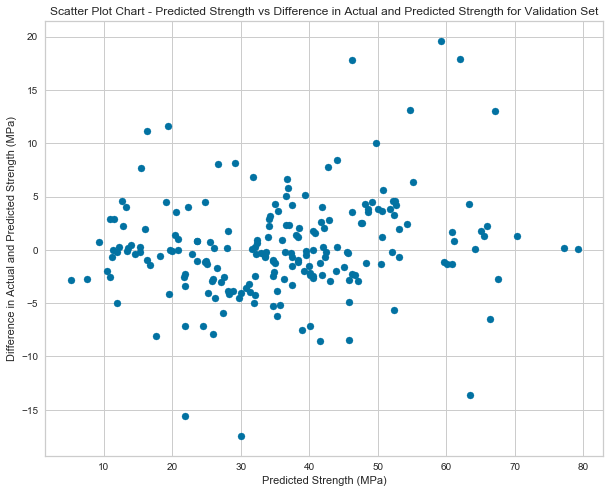

In [49]:
# TODO: Residual plot
y_diff = y_test - y_test_pred # Difference between actual and predicted y values for the testing set
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x=y_test_pred, y=y_diff)
ax.set_title("Scatter Plot Chart - Predicted Strength vs Difference in Actual and Predicted Strength for Validation Set") # Add title to plot
ax.set_xlabel("Predicted Strength (MPa)") # Add label to x-axis
ax.set_ylabel("Difference in Actual and Predicted Strength (MPa)") # Add label to y-axis



## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
1. Did we find a model that outperforms the neural network reported in the reference article? Explain.
1. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?

*YOUR ANSWER HERE*
1. Yes. With a Random Forest Regression model that has a max_depth of 20 and n_estimators=400 as its parameters, we have a model that outperforms the polynomial regression model. This model outperforms the polynomial regression model on all metrics, as the test RMS of 4.80 MPa of my model is significantly better than the polynomial regression testing RMS of 8.82 MPa and my test R2 of 0.916 is significantly better than the polynomial regression R2 of 0.791. 

2. No, our model did not outperform the neural network model on any metrics. Compared to the Neural Network testing RMS of 4.32 MPa and R2 of 0.929, my test RMS of 4.80 MPa is worse and my test R2 of 0.916 is slightly worse.

3. In this lab, we assumed that the yellowbrick concrete dataset was used in the reference article and that 20% of the data served as the test set. These assumptions can affect our conclusions since a dataset from a different source would help create more accurate results if the data was recorded from real experiments. But if the experiments were performed poorly and the data included a lot of outliers, it can also negatively affect our results as well. Using a split that is different from the 80/20 train/test split can also affect the results - using a test size that is represents less than 20% of the data can create more inaccurate results.


## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*

# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

In [116]:
conda install pip

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


C:\Users\milec\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [117]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=61e18700373b16edf15e67b83dc1bbe01735fae955e3624c4e8bcf2ab79f939d
  Stored in directory: c:\users\milec\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


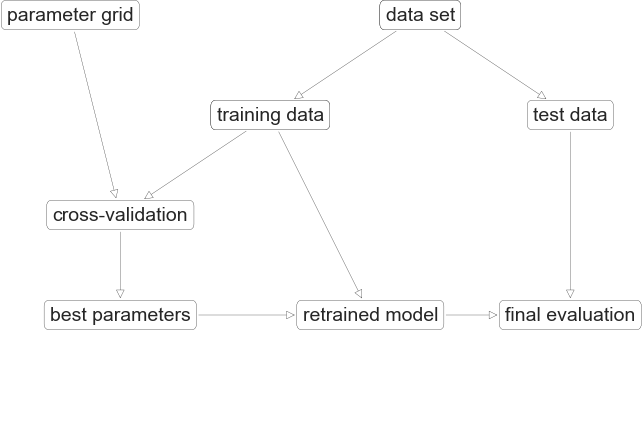

In [118]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [ ]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [ ]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*


## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [ ]:
#TODO: retrain the best estimator



## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [ ]:
#TODO: train and test set scores of retrained best model


In [ ]:
#TODO: predicted-actual plot


In [ ]:
# TODO: Residual plot


### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

*YOUR ANSWER HERE*
